In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Set default figure size
plt.rcParams['figure.figsize'] =[14.0,7.0]

In [3]:
#Load training image
image1  = cv2.imread('images/kyna.jpg')
#load query image
image2 =  cv2.imread('images/kyna1.jpg')

In [4]:
#Convert training image to RGB
training_image = cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
#Convert uery image to RGB
query_image = cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)


In [5]:
#Convert training image to grayscale
training_gray = cv2.cvtColor(training_image,cv2.COLOR_RGB2GRAY)
#Convert query image to grayscale
query_gray = cv2.cvtColor(query_image,cv2.COLOR_RGB2GRAY)

In [6]:
#Set parameters of ORB algorithm by specifying maximum number of keypoints to locate the pyramid decimation ratio
orb = cv2.ORB_create(1000,2.0)

In [7]:
#Find keypoints in training and query image and compute their ORB descriptor
keypoints_train,descriptors_train = orb.detectAndCompute(training_gray,None)
keypoints_query,descriptors_query = orb.detectAndCompute(query_gray,None)

In [8]:
#Create a Brute force matcher object,s set crosscheck to True so that BFmatcher will return consistent pairs
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck =True)


In [9]:
#Perform matching between ORB descriptors of training and query image
matches = bf.match(descriptors_train,descriptors_query)

In [10]:
#Matches with shorter distance we want so we sort the matches according to distance
matches  = sorted(matches,key = lambda x:x.distance)

In [11]:
#Connect the keypoints in training image with their best matching points in query image
result = cv2.drawMatches(training_gray,keypoints_train,query_gray,keypoints_query,matches[:300],query_gray,flags = 2)


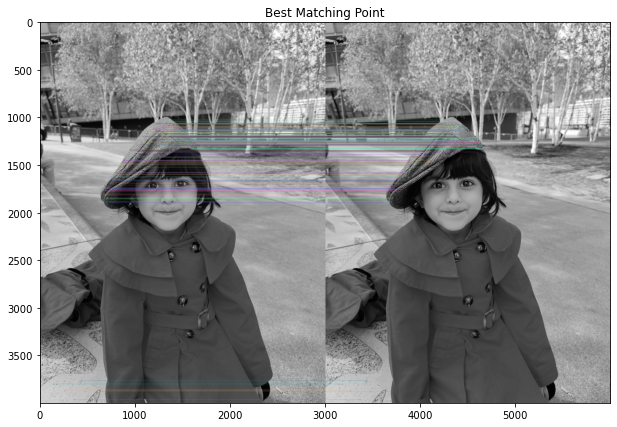

In [12]:
#Display the best matching points
plt.title('Best Matching Point')
plt.imshow(result)
plt.show()

In [13]:
#Print number of keypoints detected in trianing image
print("Number of keypoints detected in training image:",len(keypoints_train))
#Print number of keypoints detected in query image
print("Number of keypoints detected in query image:",len(keypoints_query))


Number of keypoints detected in training image: 988
Number of keypoints detected in query image: 988


In [14]:
#Print total number of matching points between training and query images
print("\n number of matching keypoints between training and query images:",len(matches))



 number of matching keypoints between training and query images: 988
